# 911 Calls Capstone Project - Solutions

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

___
* Import numpy and Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

* Import visualization libraries and set %matplotlib inline.

In [3]:
df = pd.read_csv('911.csv')

* Read in the csv file as a dataframe called df

In [4]:
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


# Short Questions
* What are the bottom 5 zipcodes for 911 calls?

In [6]:
df['zip'].value_counts().tail(5)

77316.0    1
19457.0    1
19139.0    1
19119.0    1
17752.0    1
Name: zip, dtype: int64

In [7]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


* What are the top 5 townships (twp) for 911 calls?

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

* Take a look at the 'title' column, how many unique title codes are there?

In [9]:
df['title'].nunique()

110

# Adding New Features
* In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

* *For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [10]:
df[['Reason','Departments']] = df['title'].str.split(':',expand=True)
df2 = df['Reason']
df2

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

* Most common Reason for a 911 call based off of this new column?

In [11]:
df3 = pd.DataFrame(df2.value_counts())
df3.columns = ['count']

In [12]:
df3

,count
EMS,48877
Traffic,35695
Fire,14920


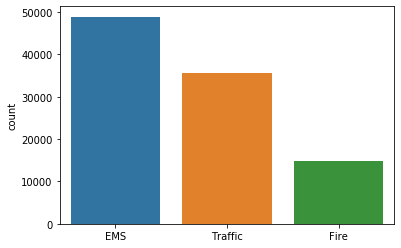

In [13]:
sns.barplot(x=df3.index,y=df3['count'],data=df3)


___
* Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [14]:
df['timeStamp'].dtype

dtype('O')

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format = '%Y-%m-%d %H:%M:%S')

In [16]:
df['timeStamp'].dtype

dtype('<M8[ns]')

In [17]:
# Convert it to DateTime object

In [18]:
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['Day of Week'] = df['timeStamp'].dt.dayofweek
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Departments,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,3


In [19]:
# Add Hour, month, Day Of week, columns in the df

In [20]:
df['Day of Week'] = df['timeStamp'].dt.day_name()
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Departments,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,Thursday


In [21]:
# map Day of week column according to the days in a week

In [22]:
df.index.value_counts()


2047     1
47810    1
17053    1
23198    1
21151    1
        ..
32101    1
25958    1
28007    1
5480     1
0        1
Length: 99492, dtype: int64

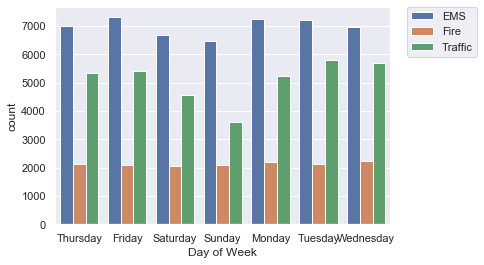

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x=df['Day of Week'], hue=df['Reason'],data=df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
 

In [24]:
# Day of Week

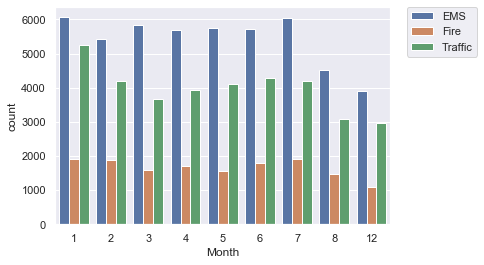

In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(x=df['Month'], hue=df['Reason'],data=df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
 

In [26]:
# Month

* You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

* Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

In [27]:
df2 = df.groupby('Month')
df2 = pd.DataFrame( df2['lat'].agg(np.size))
df2

,lat
Month,
1,13205.0
2,11467.0
3,11101.0
4,11326.0
5,11423.0
6,11786.0
7,12137.0
8,9078.0
12,7969.0


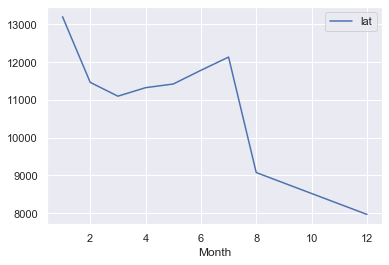

In [28]:
sns.set(style="darkgrid")
sns.lineplot(data=df2)

In [29]:
# Simple line plot of any column of byMonth

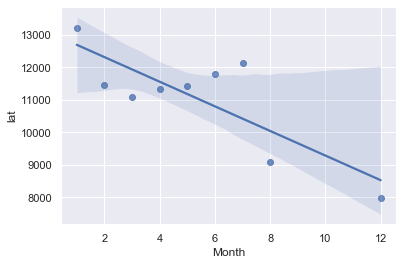

In [30]:
sns.regplot(x=df2.index, y='lat', data=df2)

In [31]:
# sns.lmplot(x=df2['lat'], y=df2.index,data=df2)   # i am not sure why lmplot does not work

In [32]:
# Now see if you can use seaborn's lmplot() to create a linear fit
# on the number of calls per month. Keep in mind you
# may need to reset the index to a column.

In [33]:
# Create a new column Date in the df

In [34]:
df['Date'] = df['timeStamp'].dt.strftime('%m/%d/%Y')     # please note the date format of 'Date'

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Departments,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thursday,12/10/2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thursday,12/10/2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,Thursday,12/10/2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,Thursday,12/10/2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,Thursday,12/10/2015


In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Departments,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thursday,12/10/2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thursday,12/10/2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,Thursday,12/10/2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,Thursday,12/10/2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,Thursday,12/10/2015


* Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

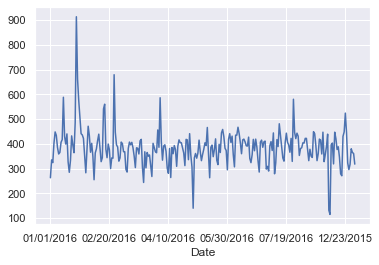

In [37]:
df.groupby(['Date']).count()['lat'].plot()          # please note that the chronological order is not respected here

In [38]:
df['Date2'] = df['timeStamp'].dt.strftime('%Y/%m/%d')

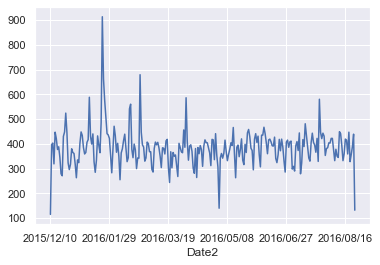

In [39]:
df.groupby(['Date2']).count()['lat'].plot()

In [40]:
# use .plot()

* Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

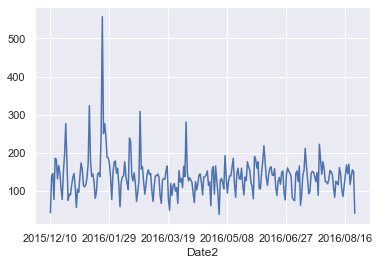

In [41]:
df[df['Reason']=='Traffic'].groupby(['Date2']).count()['lat'].plot()

In [42]:
# Traffic

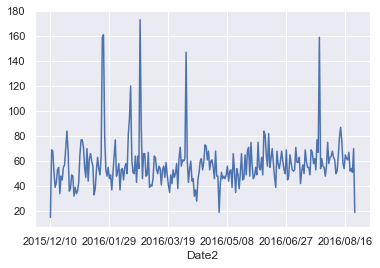

In [43]:
df[df['Reason']=='Fire'].groupby(['Date2']).count()['lat'].plot()

In [44]:
# Fire

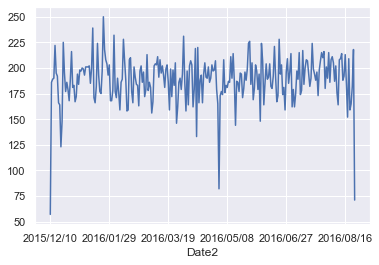

In [45]:
df[df['Reason']=='EMS'].groupby(['Date2']).count()['lat'].plot()

In [46]:
# EMS

* Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.

In [47]:
dayHour = df[['Day of Week', 'Hour']].groupby(['Day of Week', 'Hour']).size()    # if i use count, i need to add an extra column - will mess the xticklable

dayHour

Day of Week  Hour
Friday       0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wednesday    19      686
             20      668
             21      575
             22      490
             23      335
Length: 168, dtype: int64

In [56]:
dayHour = df[['Day of Week', 'Hour','lat']].groupby(['Day of Week', 'Hour']).count()    # if i use count, i need to add an extra column - will mess the xticklable

dayHour

lat
Day of Week Hour     
Friday      0     275
            1     235
            2     191
            3     175
            4     201
...               ...
Wednesday   19    686
            20    668
            21    575
            22    490
            23    335

[168 rows x 1 columns]

In [49]:
len(dayHour.index.names) > 1  #check whether we have a multiindex

True

In [50]:
# Why do i have 7 days instead of 5?

In [59]:
aa = dayHour.unstack(level=1)     # if i do only  < dayHour.unstack(level=1) > it does not work, i have to create a new df


In [60]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [61]:
aa['Day_id'] = aa.index
aa['Day_id'] = aa['Day_id'].map(sorterIndex)
aa.sort_values('Day_id', inplace=True)
aa = aa.drop(['Day_id'], axis=1)
aa

lat                                               ...            \
Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15   
Day of Week                                                    ...             
Sunday       383  306  286  268  242  240  300  402  483  620  ...  684  691   
Monday       282  221  201  194  204  267  397  653  819  786  ...  869  913   
Tuesday      269  240  186  170  209  239  415  655  889  880  ...  943  938   
Wednesday    250  216  189  209  156  255  410  701  875  808  ...  904  867   
Thursday     278  202  233  159  182  203  362  570  777  828  ...  876  969   
Friday       275  235  191  175  201  194  372  598  742  752  ...  932  980   
Saturday     375  301  263  260  224  231  257  391  459  640  ...  789  796   

                                                       
Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Sunday        663   714  670  655  537  461  415  330  
Monday        989   997  885  746  613  497  472  325  
Tuesday      1026  1019  905  731  647  571  462  274  
Wednesday     990  1037  894  686  668  575  490  335  
Thursday      935  1013  810  698  617  553  424  354  
Friday       1039   980  820  696  667  559  514  474  
Saturday      848   757  778  696  628  572  506  467  

[7 rows x 24 columns]

In [62]:
dayHour.head()

lat
Day of Week Hour     
Friday      0     275
            1     235
            2     191
            3     175
            4     201

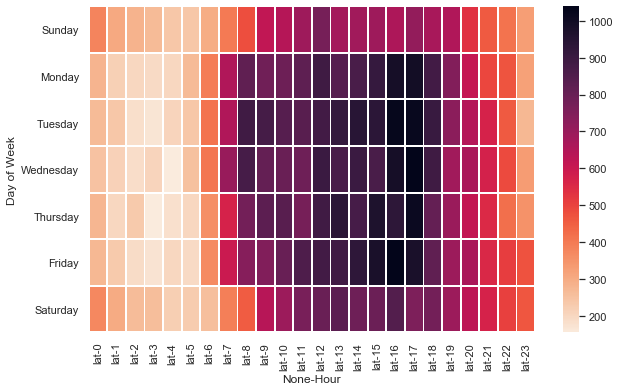

In [63]:
cmap = sns.cm.rocket_r

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(aa,linewidths=1, linecolor='white', cmap = cmap)       

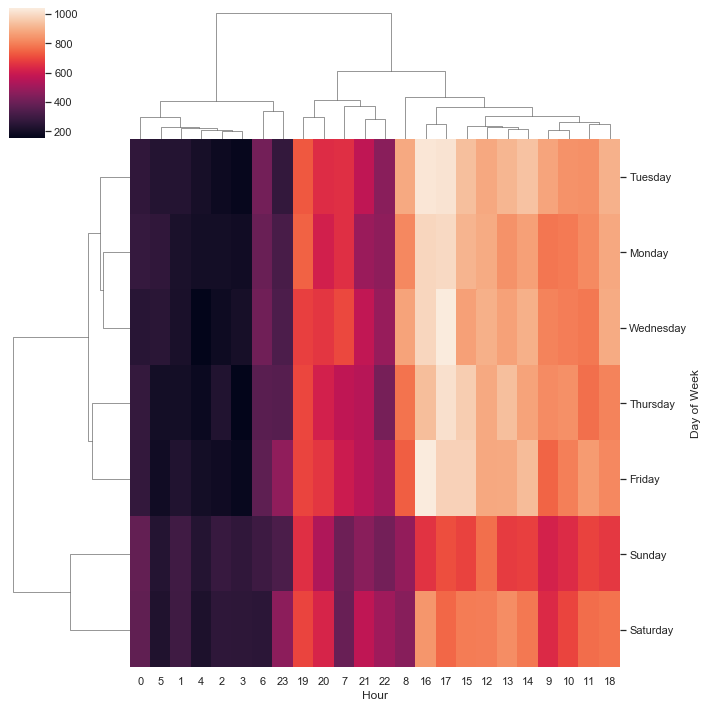

In [326]:
sns.clustermap(aa)

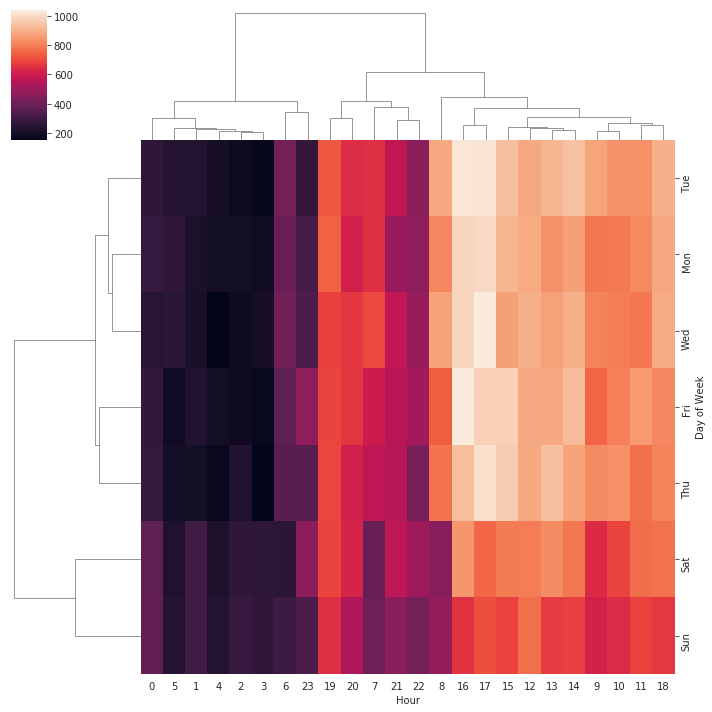

* Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [328]:
dayMonth = df[['Day of Week', 'Month']].groupby(['Day of Week', 'Month']).size()    # if i use count, i need to add an extra column - will mess the xticklable

dayMonth

Day of Week  Month
Friday       1        1970
             2        1581
             3        1525
             4        1958
             5        1730
                      ... 
Wednesday    5        1538
             6        2058
             7        1717
             8        1295
             12       1262
Length: 63, dtype: int64

In [330]:
bb = dayMonth.unstack()
bb['Day_id'] = bb.index
bb['Day_id'] = bb['Day_id'].map(sorterIndex)
bb.sort_values('Day_id', inplace=True)
bb = bb.drop(['Day_id'], axis=1)
bb

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978


In [48]:
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


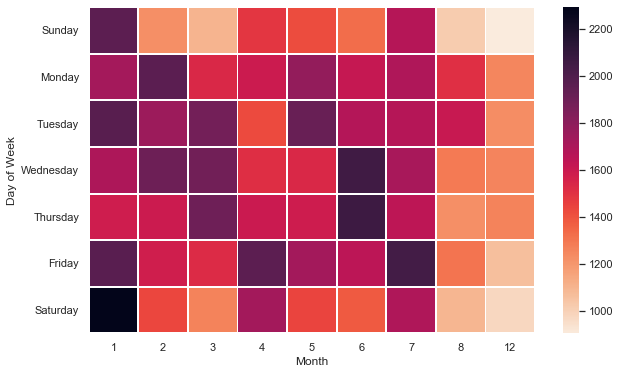

In [331]:
cmap = sns.cm.rocket_r

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(bb,linewidths=1, linecolor='white', cmap = cmap)  

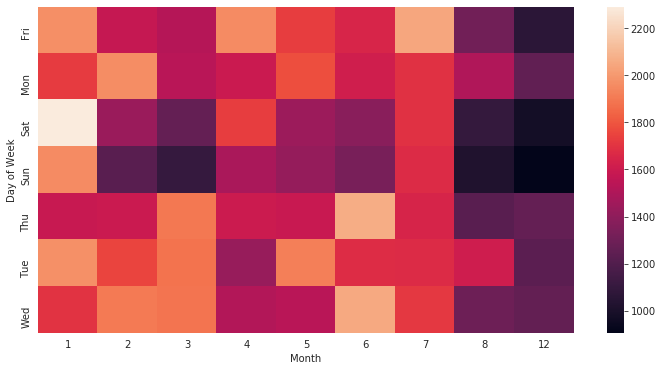

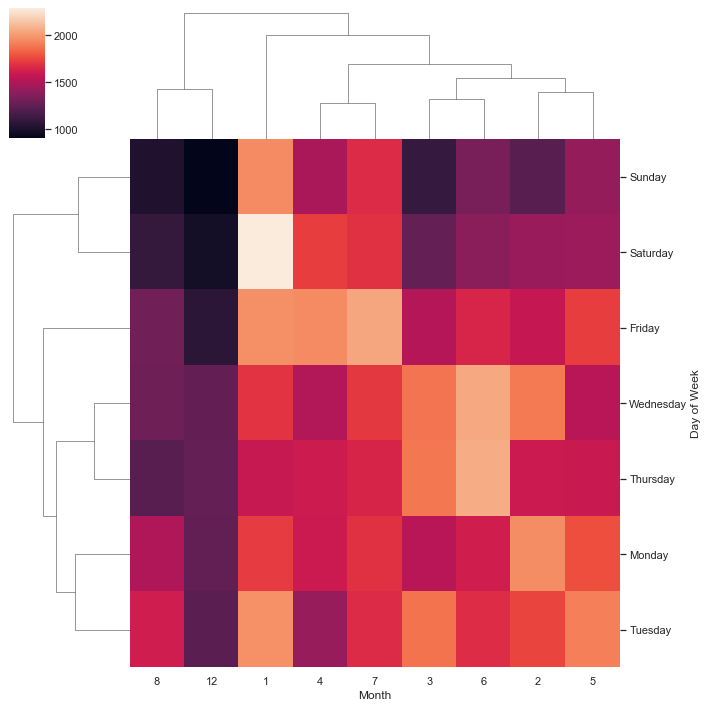

In [332]:
sns.clustermap(bb)

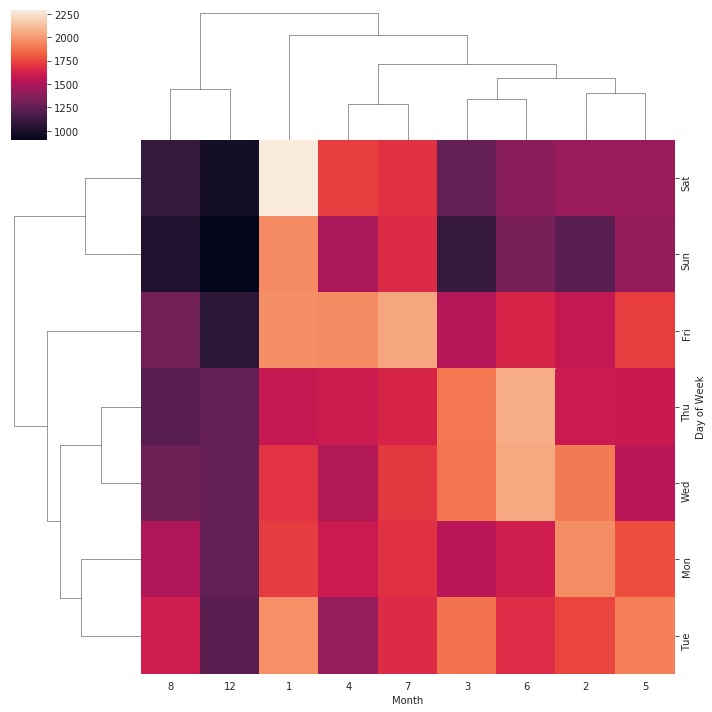

# Excellent job! 
Keep exploring data however you see fit